#   MACHINE LEARNING ALGORITHMS  FOR HEART DESEASE PREDICTION
IN THESE MACHINE LEARNING PROJECT, I HAVE COLLECTED THE DATASET FROM KAGGLE AND USE MACHINE LEARNING ALGORITHM TO PREDICT WHHETHER PERSON IS SUFFERING FROM HEART DESEASE

In [2]:
# IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the dataset
dataset=pd.read_csv('Heartdesease_dataset.csv')

Building various algorithms on dataset for prediction

1.KNeighborsClassifier
2.DecisionTreeClassifier
3.RandomForestClassifier


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

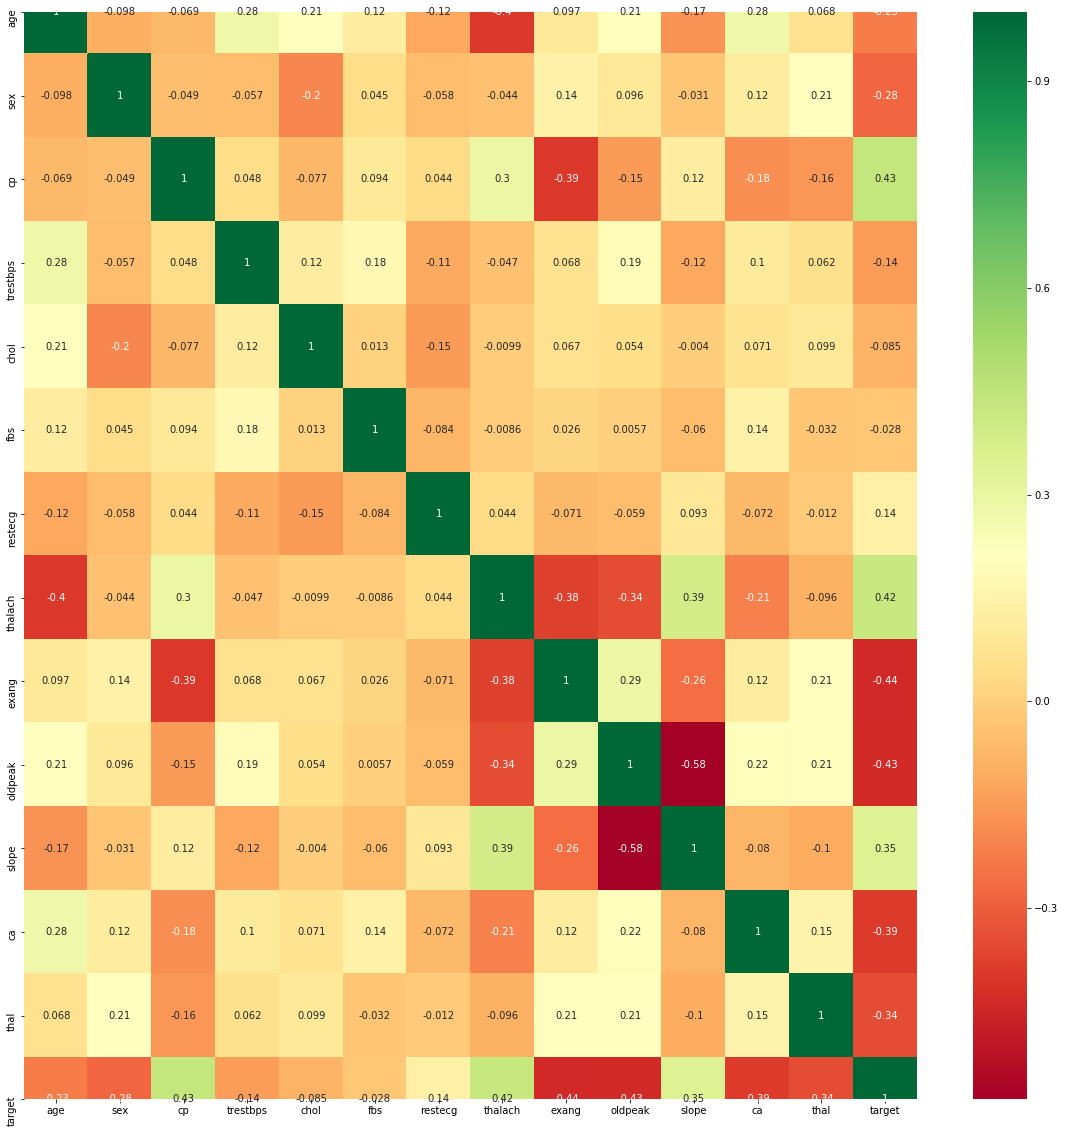

In [5]:
# FEATURE SELECTION WITH CORRELATION MATRIX
# CORRELATION WITH HEATMAP

import seaborn as sns
# get correlation of each features in dataset
corrmat=dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

# plot the heatmap
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C48D3C8>,
      dtype=object)

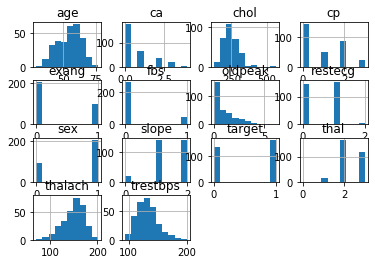

In [6]:
dataset.hist()

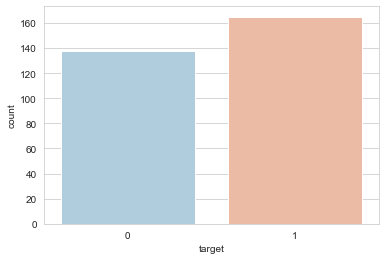

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=dataset,palette='RdBu_r')

In [8]:
# DATA PREPROCESSING

In [9]:
df=pd.get_dummies(dataset,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [10]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [11]:
# splitting and scale the dataset

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale]=standardscaler.fit_transform(df[columns_to_scale])

In [13]:
df.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [14]:
y=df['target']

y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [15]:
x=df.drop(columns=['target'])

In [16]:
x

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [17]:
# BUILDING THE MODELS WITH CROSS VALIDATION

In [20]:
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,29):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())
    

In [21]:
# visualize the  k and knn_scores

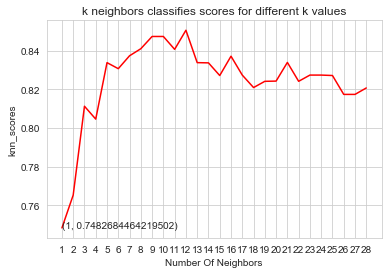

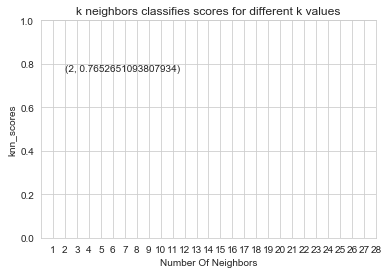

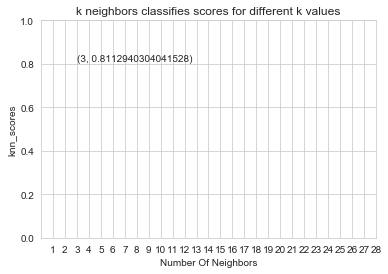

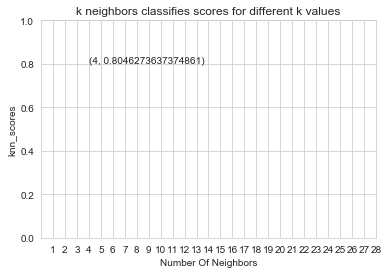

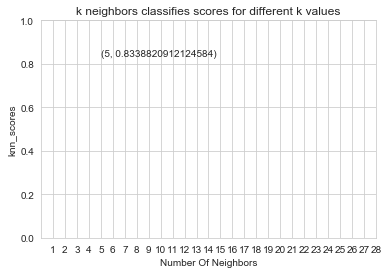

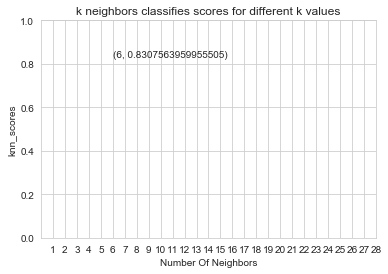

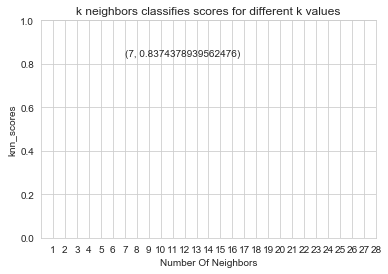

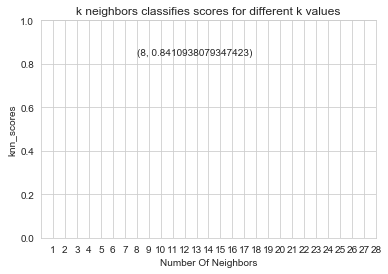

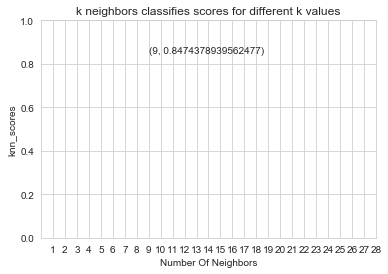

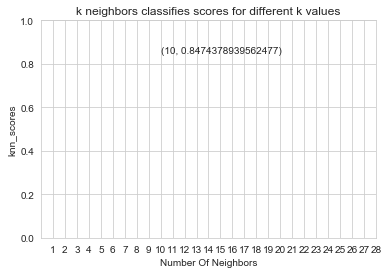

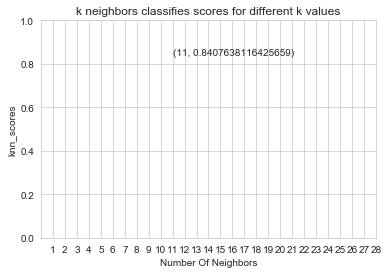

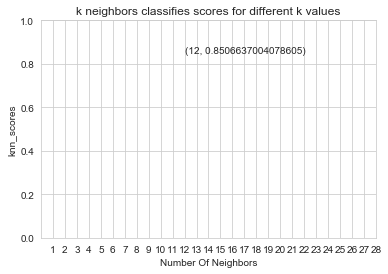

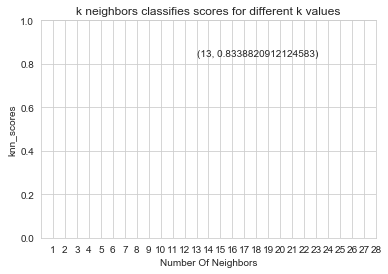

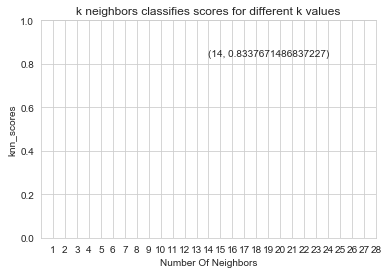

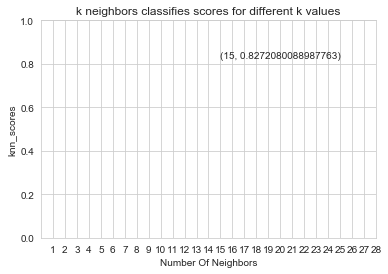

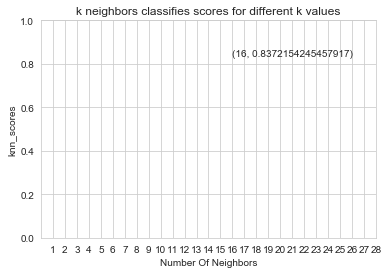

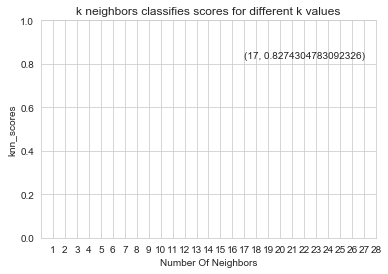

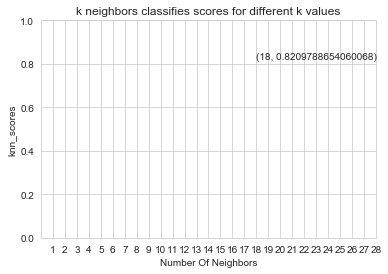

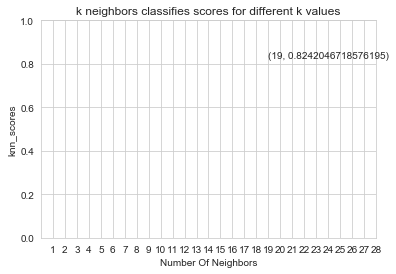

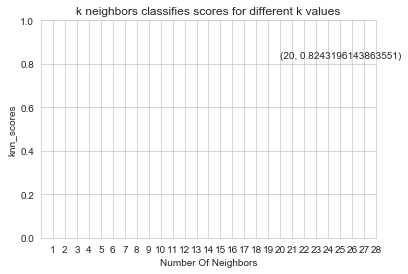

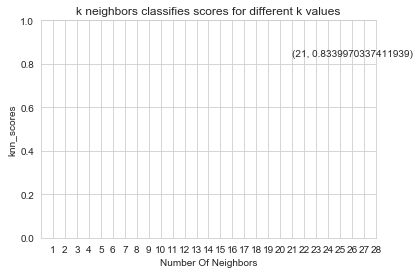

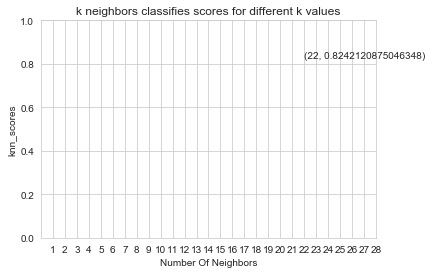

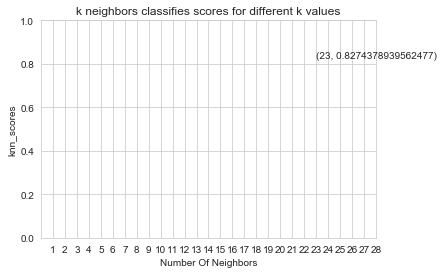

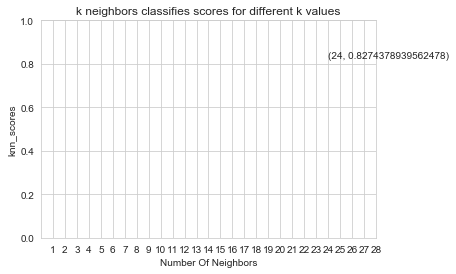

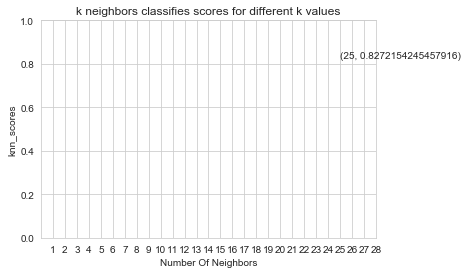

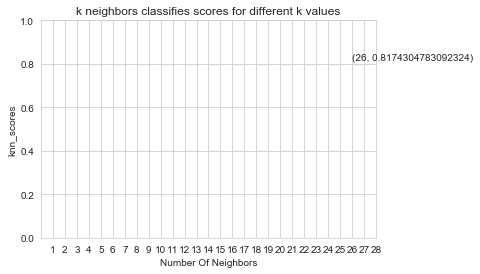

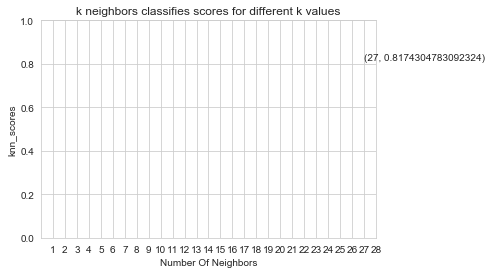

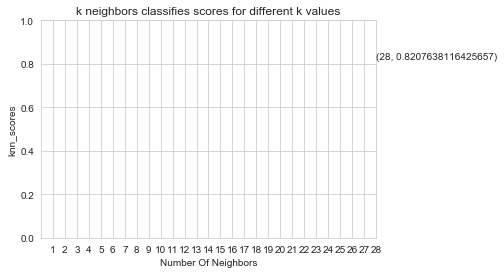

In [25]:
plt.plot([k for k in range(1,29)],knn_scores,color='red')
for i in range(1,29):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
    plt.xticks([i for i in range(1,29)])
    plt.xlabel('Number Of Neighbors')
    plt.ylabel('knn_scores')
    plt.title('k neighbors classifies scores for different k values')
    plt.show()

In [28]:
# provide the k value to the model
knn_classifier=KNeighborsClassifier(n_neighbors=12)
score=cross_val_score(knn_classifier,x,y,cv=10)
knn_scores.append(score.mean())

In [29]:
score.mean()

0.8506637004078605

In [30]:
# RANDOMFOREST CLASSIFIER

In [32]:
randomforest_classifier=RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,x,y,cv=10)

In [34]:
score.mean()

0.8279755283648498